# Load Libraries

In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.set_option("display.max_columns",None)

# Load Dataset

In [117]:
#define dataset path
movies_path="ml-latest-small/movies.csv"
ratings_path="ml-latest-small/ratings.csv"
links_path="ml-latest-small/links.csv"
tags_path="ml-latest-small/tags.csv"

movies=pd.read_csv(movies_path)
print(movies.shape)
display(movies.head())

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [118]:
ratings=pd.read_csv(ratings_path)
print(ratings.shape)
display(ratings.head())

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [119]:
tags=pd.read_csv(tags_path)
print(tags.shape)
display(tags.head())

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [120]:
#merge movies and tags
movies_tags=pd.merge(movies,tags,on="movieId")
print(movies_tags.shape)
display(movies_tags.head())

(3683, 6)


,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [121]:
movies_tags.drop(['userId','timestamp'],inplace=True,axis=1)

In [122]:
display(movies_tags.head())

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,magic board game


In [123]:
# separating genres
movies_tags['genres']=movies_tags['genres'].apply(lambda x: " ".join(x.split("|")))

In [124]:
#combining genres and tag as overview
movies_tags['overview']=movies_tags['genres']+" "+movies_tags['tag']

#droping genres and tag
movies_tags.drop(['genres','tag'],inplace=True,axis=1)
display(movies_tags.head())

,movieId,title,overview
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy fun
3,2,Jumanji (1995),Adventure Children Fantasy fantasy
4,2,Jumanji (1995),Adventure Children Fantasy magic board game


In [125]:
#drop duplicate movies
movies_tags=movies_tags.drop_duplicates(subset=['movieId'])

#reset index
movies_tags=movies_tags.reset_index(drop=True)

display(movies_tags.head())

,movieId,title,overview
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pixar
1,2,Jumanji (1995),Adventure Children Fantasy fantasy
2,3,Grumpier Old Men (1995),Comedy Romance moldy
3,5,Father of the Bride Part II (1995),Comedy pregnancy
4,7,Sabrina (1995),Comedy Romance remake


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [158]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_rating['overview'])

In [159]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
cosine_similarity_matrix = cosine_similarity(tfv_matrix, tfv_matrix)

In [160]:
print(cosine_similarity_matrix.shape)
display(cosine_similarity_matrix)

(1572, 1572)


array([[1.        , 0.21456912, 0.05630694, ..., 0.02186177, 0.12403152,
        0.06771617],
       [0.21456912, 1.        , 0.        , ..., 0.        , 0.27589447,
        0.        ],
       [0.05630694, 0.        , 1.        , ..., 0.06335562, 0.        ,
        0.04423802],
       ...,
       [0.02186177, 0.        , 0.06335562, ..., 1.        , 0.24655844,
        0.41288457],
       [0.12403152, 0.27589447, 0.        , ..., 0.24655844, 1.        ,
        0.17215925],
       [0.06771617, 0.        , 0.04423802, ..., 0.41288457, 0.17215925,
        1.        ]])

In [161]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_rating.index, index=movies_rating['title'])
display(indices)

title
Toy Story (1995)                         0
Jumanji (1995)                           1
Grumpier Old Men (1995)                  2
Father of the Bride Part II (1995)       3
Sabrina (1995)                           4
                                      ... 
Game Night (2018)                     1567
Tomb Raider (2018)                    1568
Deadpool 2 (2018)                     1569
Solo: A Star Wars Story (2018)        1570
Gintama: The Movie (2010)             1571
Length: 1572, dtype: int64

In [162]:
print(indices['Tomb Raider (2018)'])

1568


In [163]:
list(enumerate(cosine_similarity_matrix[indices['Tomb Raider (2018)']]))

[(0, 0.1443215543576549),
 (1, 0.20632047266292836),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.11747696255850659),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.08507301595066857),
 (34, 0.0),
 (35, 0.08992801008375234),
 (36, 0.04867829792929061),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.1229709156080013),
 (43, 0.20694401996029302),
 (44, 0.1887327289380928),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.05641007777743709),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.2527648462818077),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0)

In [201]:
def give_recommendation(title,k, cosine_similarity_matrix=cosine_similarity_matrix):
    
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    cosine_similarity_scores = list(enumerate(cosine_similarity_matrix[idx]))

    # Sort the movies 
    cosine_similarity_scores = sorted(cosine_similarity_scores, key=lambda x: x[1], reverse=True)

    # Scores of the top k most similar movies
    cosine_similarity_scores = cosine_similarity_scores[1:k+1]

    # Movie indices
    movie_indices = [i[0] for i in cosine_similarity_scores]
    
    # Movie indices
    movie_similarity = [i[1] for i in cosine_similarity_scores]

    # Movie titles
    movie_titles=movies_rating['title'].iloc[movie_indices].values
        
    # Top k most similar movies
    return pd.DataFrame({'Movie Title':movie_titles,'score':movie_similarity})

In [203]:
# Testing our content-based recommendation system with the "Toy Story (1995)"
df=give_recommendation('Toy Story (1995)',10)
display(df)

,Movie Title,score
0,Toy Story 2 (1999),0.973700
1,The Lego Movie (2014),0.886394
2,Shrek (2001),0.864546
3,"Bug's Life, A (1998)",0.838387
4,Space Jam (1996),0.791345
5,How the Grinch Stole Christmas (a.k.a. The Gri...,0.685722
6,"Grand Day Out with Wallace and Gromit, A (1989)",0.666016
7,Wallace & Gromit in The Curse of the Were-Rabb...,0.645357
8,Finding Nemo (2003),0.627870
9,Shrek 2 (2004),0.610813


In [206]:
title="Toy Story (1995)"
topk=10

print("Recommanded Movies for {} are:".format(title))

for i,val in enumerate(df['Movie Title'].values):
    print("{}) {}".format(i+1,val))

Recommanded Movies for Toy Story (1995) are:
1) Toy Story 2 (1999)
2) The Lego Movie (2014)
3) Shrek (2001)
4) Bug's Life, A (1998)
5) Space Jam (1996)
6) How the Grinch Stole Christmas (a.k.a. The Grinch) (2000)
7) Grand Day Out with Wallace and Gromit, A (1989)
8) Wallace & Gromit in The Curse of the Were-Rabbit (2005)
9) Finding Nemo (2003)
10) Shrek 2 (2004)


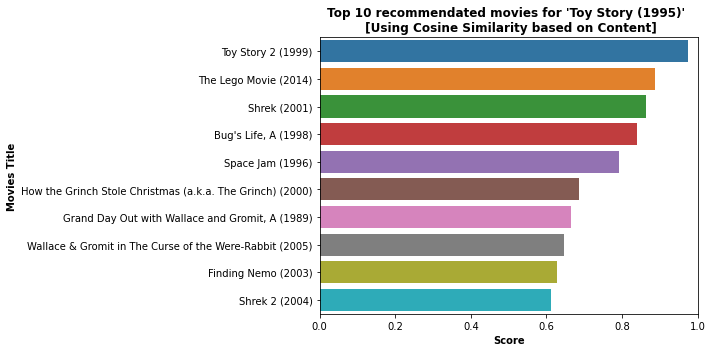

In [220]:
graph_title="Top {} recommendated movies for '{}' \n [Using Cosine Similarity based on Content]".format(topk,title)

plt.figure(figsize=(10,5))
sns.barplot(x=df['score'],y=df['Movie Title'])
plt.title(graph_title,weight='bold')
plt.xlim(0,1)
plt.xlabel("Score",weight='bold')
plt.ylabel("Movies Title",weight='bold')
plt.tight_layout()

plt.savefig(graph_title+'.jpg')
plt.show()
plt.show()